# Multi Armed Bandit Problem

The detailed explanation of this problem can been seen in the charpter 2 of [Reinforcement Learning: An Introduction (2nd edition)](http://incompleteideas.net/book/the-book-2nd.html).

## Some definitions about variables 

### Action-value Methods
Expected reward of selecting $\textbf{a}$ as the action:   
$$q_*(a)=E[R_t\mid A_t=a]$$    
The value of action $\textbf{a}$ in the step t:    
$$Q_t(a)=\frac{\sum_{i=1}^{t-1}{R_iI_{A_i=a}}}{\sum_{i=1}^{t-1}{I_{A_i=a}}}=\frac{\text{sum of the rewards when taken $\textbf{a}$ prior to t}}{\text{sum of times taken $\textbf{a}$ prior to t}}$$     
$$\begin{equation}
I_{A_i=a}=\begin{cases}
1,&\text{if taken $\textbf{a}$ in step i} \cr 0,&\text{else}
\end{cases}
\end{equation}$$


### $\epsilon$-Greedy Action Selection
We want to maximize the $Q_t(a)$ because when step t goes to infinity, the value of action $\textbf{a}$ will be close to the expexted reward.    
Greedy action selection:
$$A_t=A_t^*=\underset{a}{argmax{Q_t(a)}}$$
$\epsilon$-Greedy Action Selection:   
$$\begin{equation}
A_{t}=\begin{cases}
A_t^*,&\text{with probability $1-\epsilon$} \\ \text{random action},&\epsilon
\end{cases}
\end{equation}$$



### 10-Armed Bandit Testbed
We set the environment and the agent for this test.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

class Multi10BanditEnv:
    """10-Armed Bandit with their reward distribution"""
    mu_arms = [0.2, -0.6, 1.5, 0.6, 1.2, -1.6, -0.2, -1.2, 0.7, -0.7]
    scale = 3

    def __init__(self):
        return None

    def get_reward(self, action):
        reward = self.mu_arms[action - 1] + self.scale * np.random.rand()
        return reward

    def get_optimal_arm(self):
        return np.argmax(self.mu_arms) + 1


class Agent:
    """Setting parameters for an agent"""
    Q_a = 10 * np.ones(10)
    A = np.zeros(10)
    step = 0
    reward = 0

    def __init__(self, epsilon=0.1):
        self.env = Multi10BanditEnv()
        self.epsilon = epsilon
        self.action = np.random.randint(10) + 1

    def update_state(self):
        self.step += 1
        self.reward = self.env.get_reward(self.action)
        sum_r = self.A[self.action - 1] * self.Q_a[self.action - 1] + self.reward
        self.A[self.action - 1] += 1
        self.Q_a[self.action - 1] = sum_r / self.A[self.action - 1]

    def take_action(self):
        if np.random.rand() < self.epsilon:
            self.action = np.random.randint(10) + 1
        else:
            self.action = np.argmax(self.Q_a) + 1

    def get_average_reward(self):
        return np.dot(self.Q_a, self.A) / self.step

    def get_optimal_action(self):
        optimal = self.env.get_optimal_arm()
        return self.A[optimal - 1] / self.step

    def agent_reset(self):
        self.Q_a = 10 * np.ones(10)
        self.A = np.zeros(10)
        self.step = 0
        self.reward = 0
        self.action = np.random.randint(10) + 1


In [45]:
loop = 100
test_a = Agent(0.1)
step = 1000
average_reward=np.zeros(step)
optimal_action=np.zeros(step)
for i in range(loop):
    average_reward_1 = []
    optimal_action_1 = []
    test_a.agent_reset()
    while test_a.step < step:
        test_a.update_state()
        test_a.take_action()
        average_reward_1=np.append(average_reward_1, test_a.get_average_reward())
        optimal_action_1=np.append(optimal_action_1, test_a.get_optimal_action())
    average_reward += np.array(average_reward_1)
    optimal_action += np.array(optimal_action_1)
average_reward /= loop
optimal_action /= loop

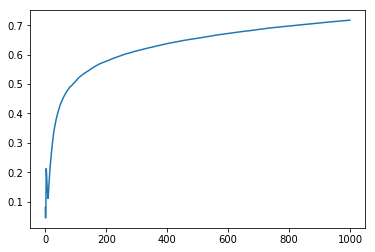

In [46]:
plt.plot(np.arange(step),optimal_action)